# Final Project: Classification

In [2]:
#Importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [3]:
#Loading the data
train = pd.read_csv("termdeposit_train.csv")
test = pd.read_csv("termdeposit_test.csv")

Checking the columns of each dataset

In [4]:
train.columns

Index(['ID', 'age', 'job', 'marital', 'education', 'default', 'balance',
       'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign',
       'pdays', 'previous', 'poutcome', 'subscribed'],
      dtype='object')

In [5]:
test.columns

Index(['ID', 'age', 'job', 'marital', 'education', 'default', 'balance',
       'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign',
       'pdays', 'previous', 'poutcome'],
      dtype='object')

Hence, 'Subscribed' is the target variable.

Checking the data types of the variables

In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31647 entries, 0 to 31646
Data columns (total 18 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   ID          31647 non-null  int64 
 1   age         31647 non-null  int64 
 2   job         31647 non-null  object
 3   marital     31647 non-null  object
 4   education   31647 non-null  object
 5   default     31647 non-null  object
 6   balance     31647 non-null  int64 
 7   housing     31647 non-null  object
 8   loan        31647 non-null  object
 9   contact     31647 non-null  object
 10  day         31647 non-null  int64 
 11  month       31647 non-null  object
 12  duration    31647 non-null  int64 
 13  campaign    31647 non-null  int64 
 14  pdays       31647 non-null  int64 
 15  previous    31647 non-null  int64 
 16  poutcome    31647 non-null  object
 17  subscribed  31647 non-null  object
dtypes: int64(8), object(10)
memory usage: 4.3+ MB


In [7]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13564 entries, 0 to 13563
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   ID         13564 non-null  int64 
 1   age        13564 non-null  int64 
 2   job        13564 non-null  object
 3   marital    13564 non-null  object
 4   education  13564 non-null  object
 5   default    13564 non-null  object
 6   balance    13564 non-null  int64 
 7   housing    13564 non-null  object
 8   loan       13564 non-null  object
 9   contact    13564 non-null  object
 10  day        13564 non-null  int64 
 11  month      13564 non-null  object
 12  duration   13564 non-null  int64 
 13  campaign   13564 non-null  int64 
 14  pdays      13564 non-null  int64 
 15  previous   13564 non-null  int64 
 16  poutcome   13564 non-null  object
dtypes: int64(8), object(9)
memory usage: 1.8+ MB


Checking the shapes of each dataset

In [8]:
train.shape

(31647, 18)

In [9]:
test.shape

(13564, 17)

Hence, we can see that we have 17 similar features in the both the dataset and 'Subscribed' is the variable that is to be predicted

## Data Exploration

In [10]:
#Printing the first 5 rows of the train dataset
train.head()

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,26110,56,admin.,married,unknown,no,1933,no,no,telephone,19,nov,44,2,-1,0,unknown,no
1,40576,31,unknown,married,secondary,no,3,no,no,cellular,20,jul,91,2,-1,0,unknown,no
2,15320,27,services,married,secondary,no,891,yes,no,cellular,18,jul,240,1,-1,0,unknown,no
3,43962,57,management,divorced,tertiary,no,3287,no,no,cellular,22,jun,867,1,84,3,success,yes
4,29842,31,technician,married,secondary,no,119,yes,no,cellular,4,feb,380,1,-1,0,unknown,no


In [11]:
#Printing the first 5 rows of the test dataset
test.head()

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,38441,32,services,married,secondary,no,118,yes,no,cellular,15,may,20,6,-1,0,unknown
1,40403,78,retired,divorced,primary,no,2787,no,no,telephone,1,jul,372,1,-1,0,unknown
2,3709,31,self-employed,single,tertiary,no,144,yes,no,unknown,16,may,676,1,-1,0,unknown
3,37422,57,services,single,primary,no,3777,yes,no,telephone,13,may,65,2,-1,0,unknown
4,12527,45,blue-collar,divorced,secondary,no,-705,no,yes,unknown,3,jul,111,1,-1,0,unknown


In [12]:
#checking for missing values in train dataset
train.isnull().sum()

ID            0
age           0
job           0
marital       0
education     0
default       0
balance       0
housing       0
loan          0
contact       0
day           0
month         0
duration      0
campaign      0
pdays         0
previous      0
poutcome      0
subscribed    0
dtype: int64

In [13]:
#Checking for missing values in test dataset
test.isnull().sum()

ID           0
age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
dtype: int64

### Univariate Analysis

#### Analysis of 'Subscribed' variable

In [14]:
#Frequency of 'subscribed'
train['subscribed'].value_counts()

no     27932
yes     3715
Name: subscribed, dtype: int64

<AxesSubplot:xlabel='subscribed', ylabel='count'>

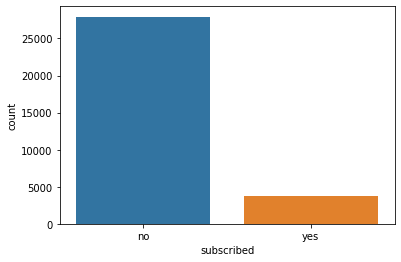

In [15]:
# Plotting the 'subscribed' frequency
sns.countplot(data=train, x='subscribed')

In [16]:
#Normalizing the frequency table of 'Subscribed' variable
train['subscribed'].value_counts(normalize=True)

no     0.882611
yes    0.117389
Name: subscribed, dtype: float64

From the above analysis we can see that only 3,715 people out of 31,647 have subscribed which is roughly 12%. 

#### Analysing th 'Job' variable

In [17]:
#Frequency table
train['job'].value_counts()

blue-collar      6842
management       6639
technician       5307
admin.           3631
services         2903
retired          1574
self-employed    1123
entrepreneur     1008
unemployed        905
housemaid         874
student           635
unknown           206
Name: job, dtype: int64

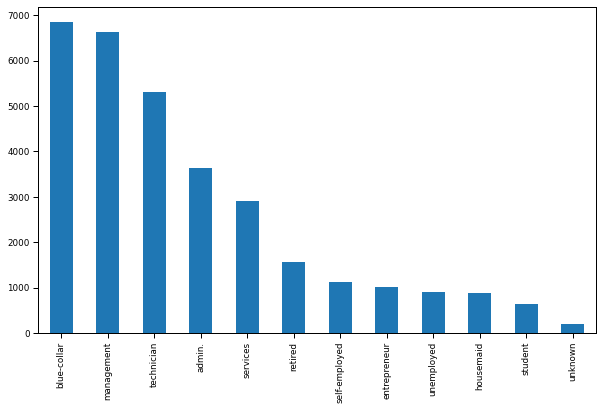

In [18]:
# Plotting the job frequency table
sns.set_context('paper')
train['job'].value_counts().plot(kind='bar', figsize=(10,6));

We can see that most of the clients beloned to blue-collar job and students are least in general as they don't make term deposits in general.

#### Analysis of 'marital' status

In [19]:
train['marital'].value_counts()

married     19095
single       8922
divorced     3630
Name: marital, dtype: int64

In [ ]:
sns.countplot(data=train, x='marital');

In [ ]:
sns.countplot(data=train, x='marital', hue='subscribed');

### Analyzing the 'age' variable

In [ ]:
sns.distplot(train['age']);

We can infer that most of the clients fall in the age group between 20-60.

## Bivariate Analysis

In [ ]:
#job vs subscribed
print(pd.crosstab(train['job'],train['subscribed']))

In [ ]:
job = pd.crosstab(train['job'],train['subscribed'])
job_norm = job.div(job.sum(1).astype(float), axis=0)


In [ ]:
job_norm.plot.bar(stacked=True,figsize=(8,6));

From the above graph we can infer that students and retired people have higher chances of subscribing to a term deposit, which is surprising as students generally do not subscribe to a term deposit. The possible reason is that the number of students in the dataset is less and comparatively to other job types, more students have subscribed to a term deposit.

In [ ]:
#Marital status vs subscribed
pd.crosstab(train['marital'], train['subscribed'])

In [ ]:
marital = pd.crosstab(train['marital'], train['subscribed'])
marital_norm = marital.div(marital.sum(1).astype(float), axis=0)
marital_norm

In [ ]:
marital_norm.plot.bar(stacked=True, figsize=(10,6));

From the above analysis we can infer that marital status doesn't have a major impact on the subscription to term deposits.

In [ ]:
#default vs subscription
pd.crosstab(train['default'], train['subscribed'])

In [ ]:
dflt = pd.crosstab(train['default'], train['subscribed'])
dflt_norm = dflt.div(dflt.sum(1).astype(float), axis=0)
dflt_norm

In [ ]:
dflt_norm.plot.bar(stacked=True, figsize=(6,6))

We can infer that clients having no previous default have slightly higher chances of subscribing to a term loan as compared to the clients who have previous default history.

In [ ]:
# Converting the target variables into 0s and 1s
train['subscribed'].replace('no', 0,inplace=True)
train['subscribed'].replace('yes', 1,inplace=True)

In [ ]:
train['subscribed']

In [ ]:
#Correlation matrix
tc = train.corr()
tc

In [ ]:
fig,ax= plt.subplots()
fig.set_size_inches(20,10)
sns.heatmap(tc, annot=True, cmap='YlGnBu')

We can infer that duration of the call is highly correlated with the target variable. As the duration of the call is more, there are higher chances that the client is showing interest in the term deposit and hence there are higher chances that the client will subscribe to term deposit.

## Model Building

In [ ]:
target = train['subscribed']
train = train.drop('subscribed', axis=1)

In [ ]:
#generating dummy values on the train dataset
train = pd.get_dummies(train)
train.head()

Splitting the data into train and validation set such as to validate the results of our model on the validation set.
keeping 20% of the dataset as our validation set and the rest as our training set.

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(train, target, test_size=0.2, random_state=12)

Now our data is ready and it's time to build our model and check its performance. Since it's a classification problem, I'll be using Logistic Regression model for this problem.

## Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
#creating an object of logistic regression model
lreg = LogisticRegression()

In [ ]:
#fitting the data into the model
lreg.fit(X_train,y_train)

In [ ]:
#Making predictions on the validation set
pred = lreg.predict(X_val)

Checking the accuracy of our model

In [ ]:
from sklearn.metrics import accuracy_score_score

In [ ]:
#Calculating the accuracy score
accuracy_score(y_val,pred)

We got an accuracy score of around 89% on the validation dataset. Logistic regression has a linear decision boundary. What if our data have non linearity? We need a model that can capture this non linearity.

Using Decision Tree algorithm to for dealing with non-linearity

## Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
#creating an object of Decision tree
clf = DecisionTreeClassifier(max_depth=4, random_state=0)

In [ ]:
#fitting the model
clf.fit(X_train, y_train)

In [ ]:
#making predictions on the validation set
predict = clf.predict(X_val)
predict

In [ ]:
#Calculating the accuracy
accuracy_score(y_val,predict)

We got an accuracy of more than 90% on the validation set. 

Let's now make the prediction on test dataset

In [ ]:
test = pd.get_dummies(test)
test.head()

In [ ]:
test_pred = clf.predict(test)
test_pred

Finally, we will save these predictions into a csv file. 

In [ ]:
submissions = pd.DataFrame()

In [ ]:
submissions['ID'] = test['ID']
submissions['subscribed'] = test_pred

In [ ]:
submissions['subscribed']

Since the target variable is yes or no, we will convert 1 and 0 in the predictions to yes and no respectively.

In [ ]:
submissions['subscribed'].replace(0,'no',inplace=True)
submissions['subscribed'].replace(1,'yes',inplace=True)

In [ ]:
submissions['subscribed']

In [ ]:
submissions.to_csv('submission file.csv', header=True, index=False)